# Mounting the drive



In [1]:
from google.colab import drive
import sys

#Mount your Google drive to the VM
drive.mount('/content/gdrive')
sys.path.append("/content/drive/My Drive/Deep Learning FYP/Code")

#Follow link and give permission, copy code and paste in text box
#You only have to do this once per session

Mounted at /content/gdrive


Setting up directory

In [2]:
%cd /content/gdrive/My Drive/Deep Learning FYP/Code/Fernet

/content/gdrive/My Drive/Deep Learning FYP/Code/Fernet


In [3]:
pwd

'/content/gdrive/My Drive/Deep Learning FYP/Code/Fernet'

# Python Libraries used

In [ ]:
from PIL import Image 
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
# from keras.utils import plot_model

#___________
import matplotlib.image as mpimg
import pickle


# Loading pickle object 

In [ ]:
def open_test_data():
    return open('Dataset on local disk', 'rb')

with open_test_data() as f:
    train_images = pickle.load(f) 
    train_labels = pickle.load(f)
    test_images = pickle.load(f)
    test_labels = pickle.load(f)


28709
28709
7178
7178


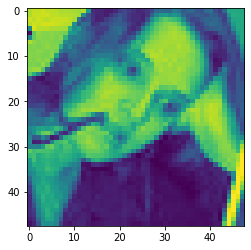

In [ ]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_images))
plt.imshow(train_images[-3])
 

#Counts and Number of images

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


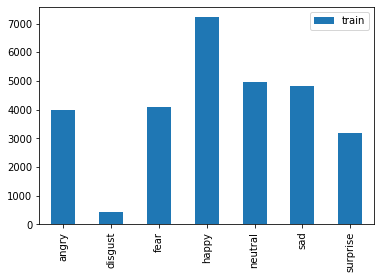

In [ ]:
train_dir = '/content/gdrive/My Drive/Deep Learning FYP/Code/train/'
test_dir = '/content/gdrive/My Drive/Deep Learning FYP/Code/test/'
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')

print(train_count)
print(test_count)
 
train_count.transpose().plot(kind='bar')


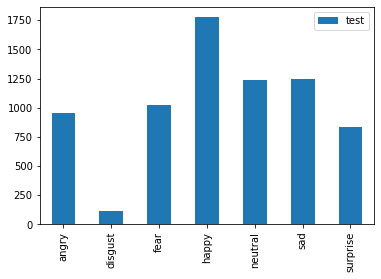

In [ ]:
test_count.transpose().plot(kind='bar')

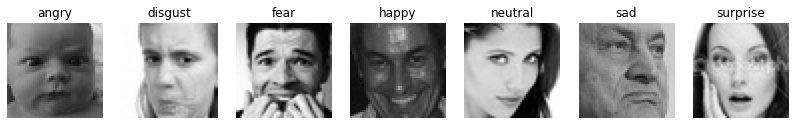

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off') #aefaf
    i += 1
plt.show()

# Dataset and Datagenerator


In [ ]:
img_h = 48
img_w= 48
batch_s = 50

# Chaing array into numpy arrays
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
#Reshaping the images
train_images = np.array(train_images)
train_images = np.expand_dims( train_images, axis=-1)
train_images.shape
test_images = np.array(test_images)
test_images = np.expand_dims( test_images, axis=-1)
test_images.shape

(7178, 48, 48, 1)

In [ ]:
# Checking labels length
print(y_train.shape)
print(y_test.shape)

(28709,)
(7178,)


#One hot represenation of test and train labels

In [ ]:
from keras.utils.np_utils import to_categorical   
 
y_train = to_categorical(y_train,num_classes=7)
y_test =  to_categorical(y_test,num_classes=7)


[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
y_train.shape
print(train_labels[:5])
print(y_train[:5])

(4, 5, 1, 6, 2)
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]]


# Using flow method

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow(train_images,
                                  y=y_train,
                                  batch_size=50,
                                  shuffle=True,
                                  sample_weight=None,
                                  seed=None,
                                  subset=None
                              )
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow(np.array(test_images),
                                  y=y_test,
                                  batch_size=50,
                                  shuffle=True,
                                  sample_weight=None,
                                  seed=None,
                                  subset=None
                              )


# Defining the model

In [ ]:
def get_model(input_size, classes = 7):

  #Initialising the CNN
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2, 2))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(classes, activation='softmax'))

  #Compliling the model
  model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

  return model



In [ ]:
fernet = get_model((48,48,1),7 )
fernet.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       2

In [ ]:
plot_model(fernet, to_file='fernet.png', show_shapes=True, show_layer_names=True)

#keras callbacks

In [ ]:
chk_path = 'ferNet.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Saving best weights 
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

# Stop the training when monitored metric has stopped imporving
earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)

# Reduce learning Rate when loss isn't improving                    
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]


#training and testing of network

In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = fernet.fit(x=training_set,
                 validation_data=test_set,
                 epochs=60,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/60
574/574 [==============================] - 52s 32ms/step - loss: 4.8368 - accuracy: 0.2460 - val_loss: 3.8819 - val_accuracy: 0.3555

Epoch 00001: val_loss improved from inf to 3.88195, saving model to ferNet.h5
Epoch 2/60
574/574 [==============================] - 19s 33ms/step - loss: 3.5332 - accuracy: 0.3311 - val_loss: 2.9850 - val_accuracy: 0.4008

Epoch 00002: val_loss improved from 3.88195 to 2.98496, saving model to ferNet.h5
Epoch 3/60
574/574 [==============================] - 19s 33ms/step - loss: 2.9455 - accuracy: 0.3762 - val_loss: 2.4966 - val_accuracy: 0.4371

Epoch 00003: val_loss improved from 2.98496 to 2.49657, saving model to ferNet.h5
Epoch 4/60
574/574 [==============================] - 19s 33ms/step - loss: 2.4925 - accuracy: 0.4105 - val_loss: 2.1278 - val_accuracy: 0.4685

Epoch 00004: val_loss improved from 2.49657 to 2.12778, saving model to ferNet.h5
Epoch 5/60
574/574 [==============================] - 19s 33ms/step - loss: 2.1574 - accuracy: 0

#Plotting Results

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


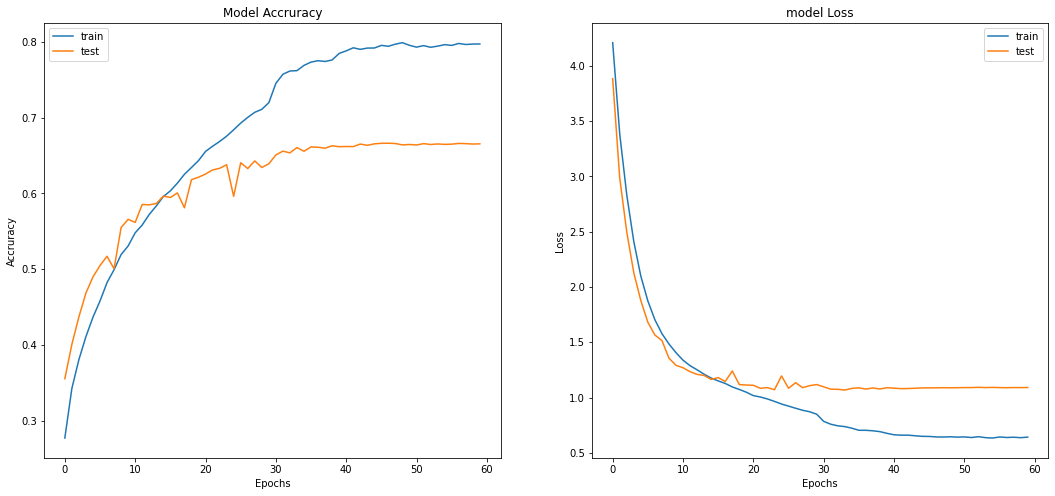

In [ ]:
print(hist.history.keys())
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accruracy')
plt.xlabel('Epochs')
plt.ylabel('Accruracy')
plt.legend(['train','test'],loc='upper left')

plt.subplot(122)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Evaluation 

In [ ]:
train_loss,train_accu = fernet.evaluate(training_set)
test_loss, test_accu = fernet.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

144/144 [==============================] - 1s 9ms/step - loss: 1.0902 - accuracy: 0.6655
final train accuracy = 87.20 , validation accuracy = 66.55


In [ ]:
fernet.save_weights('fernet_bestweight.h5')